# Comparing Full Text 

### Import and setup

In [120]:
import json, requests, math, re, string, nltk

# allow matplotlib to run in-line
% matplotlib inline 

nltk.download("punkt") # Word tokenizer
nltk.download("stopwords") # Stop words
from nltk import word_tokenize

ocUrl = 'https://open.library.ubc.ca/'
ocApiUrl = 'https://oc-index.library.ubc.ca' # APPY URL

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Set API Key

Get your own API key at: https://open.library.ubc.ca/research

In [121]:
apiKey = 'ac40e6c2cb345593ed1691e0a8b601bba398e42d85f81f893c5ab709cec63c6c'

In [122]:
collection = '24'
itemOneID = '1.0053673'
itemTwoID = '1.0069900'

### Get items

In [123]:
fullText = []

# Get first item
itemUrl = ocApiUrl+'/collections/'+collection+'/items/'+itemOneID+'?apiKey='+apiKey
apiResponse = requests.get(itemUrl).json()
item = apiResponse['data']
itemNameOne = item['Title'][0]['value']

### Clean text ###
cleanFullText = item['FullText'][0]['value'].lower()
pattern = re.compile('[\W_]+')
cleanFullText = pattern.sub(' ', cleanFullText)

fullText.append(cleanFullText)

### Get second item ###
itemUrl = ocApiUrl+'/collections/'+collection+'/items/'+itemTwoID+'?apiKey='+apiKey
apiResponse = requests.get(itemUrl).json()
item = apiResponse['data']
itemNameTwo = item['Title'][0]['value']

# Clean text
cleanFullText = item['FullText'][0]['value'].lower()
pattern = re.compile('[\W_]+')
cleanFullText = pattern.sub(' ', cleanFullText)

fullText.append(cleanFullText)

print(itemNameOne)
print(ocUrl+'collections/'+collection+'/items/'+itemOneID)
print("vs")
print(itemNameTwo)
print(ocUrl+'collections/'+collection+'/items/'+itemTwoID)

Positive solitude : an examination of individuals who spend frequent time alone
https://open.library.ubc.ca/collections/24/items/1.0053673
vs
Content analysis of online personal advertisements : attributes desired and offered
https://open.library.ubc.ca/collections/24/items/1.0069900


### Compare character counts

In [124]:
print("Full text 1 character count: "+str(len(fullText[0])))
print("Full text 2 character count: "+str(len(fullText[1])))

Full text 1 character count: 131223
Full text 2 character count: 151519


### Tokenize full text

In [125]:
words = []
words.append(word_tokenize(fullText[0]))
words.append(word_tokenize(fullText[1]))

### Compare word counts

In [126]:
print("Full text 1 word count: "+str(len(words[0])))
print("Full text 2 word count: "+str(len(words[1])))

Full text 1 word count: 21262
Full text 2 word count: 27188


### Compare unique word counts

In [127]:
print("Full text 1 word count: "+str(len(set(words[0]))))
print("Full text 2 word count: "+str(len(set(words[1]))))

Full text 1 word count: 2825
Full text 2 word count: 3177


### Collocations

In [128]:
text = nltk.Text(words[0])
print("Full text 1:")
text.collocations()
print("--------------------")
print("Full text 2:")
print("--------------------")
text = nltk.Text(words[1])
text.collocations()

Full text 1:
time alone; social phobia; frequent time; spend frequent; self
declared; mean score; two groups; attachment style; spending time;
happy participants; declared loners; chi square; new york; social
support; loner construct; main reason; subjective happiness; phobia
extraversion; north america; seek solitude
--------------------
Full text 2:
--------------------
intimate encounter; physical attractiveness; long term; social skills;
buss 1994; attributes desired; social attitudes; relationship sought;
short term; gender differences; see table; online daters; mate
preferences; placers seeking; personal advertisements; web sites;
logistic regression; online dating; attributes offered; web site


### Frequency Distributions

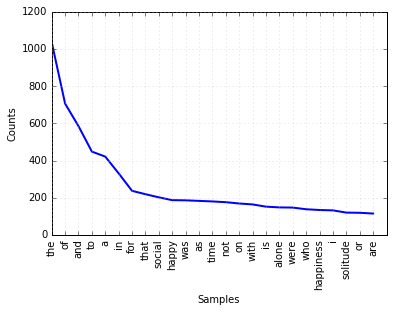

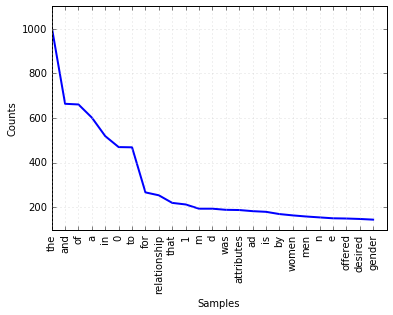

In [129]:
from nltk import FreqDist
allWords = words[0] + words[1]
textOne = nltk.Text(words[0])
textTwo = nltk.Text(words[1])
fdistOne = FreqDist(textOne)
fdistTwo = FreqDist(textTwo)
fdistOne.plot(25)
fdistTwo.plot(25)

### Total Dispersion Plot

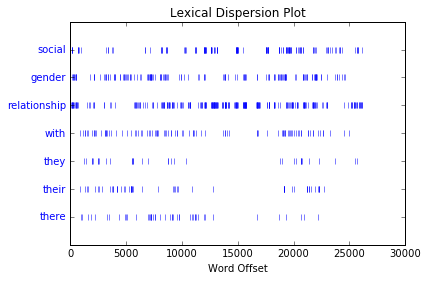

In [144]:
text.dispersion_plot(["social", "gender", "relationship", "with", "they", "their", "there"])

### Comparing time it would take to read

If top readers read at speeds of above 1000 words per minute (wpm) with near 85% comprehension, they only represent 1% of readers.

Average readers are the majority and only reach around 200 wpm with a typical comprehension of 60%.

[Source: http://www.readingsoft.com/ (questionable but eh ) ]

In [190]:
topReadTimeOne = round(((len(words[0])/1000)/60), 2)
topReadTimeTwo = round(((len(words[1])/1000)/60), 2)

avgReadTimeOne = round(((len(words[0])/200)/60), 2)
avgReadTimeTwo = round(((len(words[1])/200)/60), 2)

print("It would take a top reader roughly "+str(topReadTimeOne)+" hours to read the first item")
print("It would take a top reader roughly "+str(topReadTimeTwo)+" hours to read the second item")
print("\n")
print("It would take the average reader roughly "+str(avgReadTimeOne)+" hours to read the first item")
print("It would take the average reader roughly "+str(avgReadTimeTwo)+" hours to read the second item")

It would take a top reader roughly 0.35 hours to read the first item
It would take a top reader roughly 0.45 hours to read the second item


It would take the average reader roughly 1.77 hours to read the first item
It would take the average reader roughly 2.27 hours to read the second item


### Which is more positive? 

Sentiment Analysis is the process of determining whether a piece of writing is positive, negative or neutral. It's also known as opinion mining, deriving the opinion or attitude of a speaker. A common use case for this technology is to discover how people feel about a particular topic.

#### Load words into dictionary

In [184]:
adj = 'dictionaries/adj.txt'
adv = 'dictionaries/adv.txt'
noun = 'dictionaries/noun.txt'
verb = 'dictionaries/verb.txt'

sent = dict()
import codecs

with codecs.open(adj, "r",encoding='utf-8', errors='ignore') as fdata:    
    for line in fdata:
       (key, val) = line.split()
       sent[key] = val

with codecs.open(adv, "r",encoding='utf-8', errors='ignore') as fdata:    
    for line in fdata:
       (key, val) = line.split()
       sent[key] = val
        
with codecs.open(noun, "r",encoding='utf-8', errors='ignore') as fdata:    
    for line in fdata:
       (key, val) = line.split()
       sent[key] = val
        
with codecs.open(verb, "r",encoding='utf-8', errors='ignore') as fdata:    
    for line in fdata:
       (key, val) = line.split()
       sent[key] = val

#### Score each word in each text

In [189]:
firstScore = 0
for word in words[0]:
    if word in sent:
        firstScore += int(sent[word])

secondScore = 0
for word in words[1]:
    if word in sent:
        secondScore += int(sent[word])
        
print(itemNameOne+" has a score of :::: "+str(firstScore))
print(itemNameTwo+" has a score of :::: "+str(secondScore))

Positive solitude : an examination of individuals who spend frequent time alone has a score of :::: 1793
Content analysis of online personal advertisements : attributes desired and offered has a score of :::: 1323
